<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.2: K-Means bad cases

INSTRUCTIONS:

- Run the cells
- Observe and understand the results
- Answer the questions

In [0]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
import seaborn as sbn

In [0]:
X1, _ = make_circles(n_samples = 400, factor = 0.3, noise = 0.05)

In [0]:
columns = 'A B'.split()

X = pd.DataFrame(X1, columns = columns)

In [0]:
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(X.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 400 rows and 2 columns
Basic Statistics about X__________________________________________________
                A           B
count  400.000000  400.000000
mean    -0.000127   -0.002186
std      0.524780    0.520336
min     -1.093653   -1.044087
25%     -0.286222   -0.284303
50%      0.001867   -0.014196
75%      0.295057    0.277434
max      1.074682    1.047195

Sample of X__________________________________________________
          A         B
0  0.744750 -0.721539
1  1.018127 -0.050333
2  0.991970  0.382308
3  0.058825  0.325907
4  0.715687  0.766104


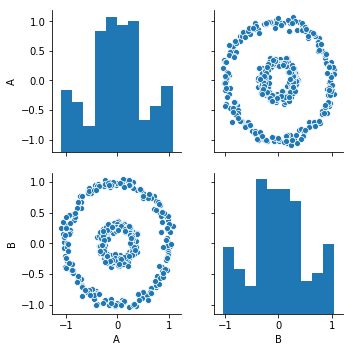

In [0]:
sbn.pairplot(X)
plt.show()

### Question: What are other important things to know about the data? Comment on:
- Types
- Availability
- Dispersion and Distribution

### Question: Which features could/should be used to cluster the data points?

In [0]:
def print_centroids(centroids):
    global step
    if show_steps:
        print('(Step) Step %d' % step)
        for c in centroids:
            print(', '.join(['%.3f' % f for f in c]))
        step += 1

In [0]:
def create_centroids(K, features):
    centroids = []
    for i in range(K):
        dimensions = []
        for f in features:
            x = np.random.uniform(X[f].min(), X[f].max())
            dimensions.append(x)
        centroids.append(dimensions)

    print_centroids(centroids)

    return centroids

In [0]:
def closest_centroid(x, centroids):
    distances = []
    p = np.array(x)
    for c in centroids:
        q = np.array(c)
        d = np.sqrt( np.square(p - q).sum() )
        distances.append(d)

    return np.array(distances).argmin()

In [0]:
def update_centroid(X, y, centroids):
    c = []
    for i in range(len(centroids)):
        if X[y == i].shape[0]:
            dimensions = []
            for f in X.columns:
                x = X[f][y == i].mean()
                dimensions.append(x)
            c.append(dimensions)
        else:
            c.append(centroids[i])

    print_centroids(c)

    return c

In [0]:
def plot_data(ax, X, y, centroids, show_clusters = True):
    a = [z[0] for z in centroids]
    b = [z[1] for z in centroids]

    if show_clusters:
        colours = 'rgbykcm'
        for i in range(len(centroids)):
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], c = colours[i], label = 'Cluster %d' % i)
    else:
        ax.scatter(X[features[0]], X[features[1]], label = 'Data Point')
        
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

    for i in range(len(centroids)):
        for s in range(step + 1):
            e = [z[i][0] for z in centroids_list]
            f = [z[i][1] for z in centroids_list]
            ax.plot(e, f, c = 'k', marker = '+', linewidth = 1)

        c = colours[i] if show_clusters else 'k'
        ax.axvline(x = a[i], color = c, linestyle = '--', linewidth = 1)
        ax.axhline(y = b[i], color = c, linestyle = '--', linewidth = 1)
    ax.scatter(a, b, c = 'k', linewidths = 5, marker = 'x', label = 'Centroid')

    t = '\n'.join(['%d: (%.3f, %.3f)' % (i, a, b) for (i, (a, b)) in enumerate(centroids)])
    ax.text(0.69, -1.1, t)

    ax.legend()

In [0]:
step = 0
show_steps = True

(Step) Step 0
0.411, 0.885
-0.757, -0.075
-0.242, 0.415
0.726, -0.338
-0.423, -0.006
(Step) Step 1
0.450, 0.796
-0.846, -0.248
-0.122, 0.419
0.494, -0.340
-0.180, -0.204
(Step) Step 2
0.540, 0.740
-0.879, -0.207
-0.143, 0.421
0.508, -0.332
-0.167, -0.298
(Step) Step 3
0.602, 0.699
-0.908, -0.156
-0.158, 0.406
0.530, -0.292
-0.148, -0.403
(Step) Step 4
0.617, 0.676
-0.917, -0.113
-0.156, 0.393
0.525, -0.295
-0.150, -0.434
(Step) Step 5
0.630, 0.669
-0.934, -0.071
-0.156, 0.391
0.526, -0.279
-0.157, -0.462
(Step) Step 6
0.630, 0.669
-0.939, -0.057
-0.164, 0.379
0.521, -0.265
-0.156, -0.488
(Step) Step 7
0.630, 0.669
-0.941, -0.028
-0.167, 0.369
0.519, -0.261
-0.156, -0.503
(Step) Step 8
0.617, 0.676
-0.941, -0.028
-0.169, 0.364
0.514, -0.261
-0.159, -0.505
(Step) Step 9
0.617, 0.676
-0.941, -0.028
-0.169, 0.364
0.510, -0.260
-0.162, -0.508
(Step) Step 10
0.617, 0.676
-0.941, -0.028
-0.169, 0.364
0.510, -0.260
-0.162, -0.508


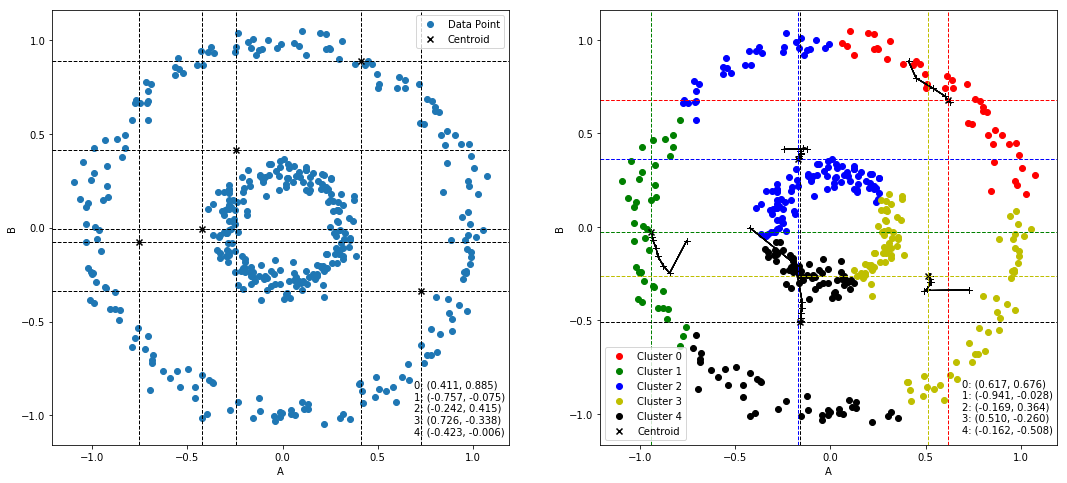

In [0]:
K = 5

features = ['A', 'B']

centroids = create_centroids(K, features)
centroids_list = [centroids]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)

while True:
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis = 1).values

    old_c = centroids.copy()

    centroids = update_centroid(X[features], y, centroids)
    centroids_list.append(centroids)

    if old_c == centroids:
        break

plot_data(axes[1], X[features], y, centroids)
plt.show()



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



